In [1]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression  # 线性回归
from sklearn.model_selection import train_test_split  # 这里是引用了交叉验证

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
plt.rcParams['font.family'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
%matplotlib inline

In [2]:
%store -r samples_data
# cluster 1st
%store -r model_features_1st
%store -r produc_features_1st
%store -r weight_1st
# cluster 2nd
%store -r model_features_2nd
%store -r produc_features_2nd
%store -r weight_2nd

In [3]:
if ('时间', 'Unnamed: 1_level_1') in model_features_1st.keys():
    del model_features_1st[('时间', 'Unnamed: 1_level_1')]
model_features_1st.head(n=5)

S-ZORB.PDT_2104.PV S-ZORB.AT_1001.PV S-ZORB.TE_7504.DACA  \
               反应器顶底压差          进装置原料硫含量          K-102A排气温度   
324          -1.188444         -0.626294           -0.095995   
323          -1.316514         -0.397364           -0.095995   
322          -1.398743         -0.321819           -0.095995   
321          -1.422260         -0.149718           -0.095995   
320          -1.540949         -0.133473           -0.095995   

    S-ZORB.TC_2101.PV S-ZORB.TE_2301.PV S-ZORB.PT_7510B.DACA  \
               反吹氢气温度            D105温度           K-103B排气压力   
324          0.529498         -0.023240             4.457135   
323          0.515957          0.204961             4.466896   
322          0.544970          0.195091             4.464652   
321          0.532671         -0.158540             4.463725   
320          0.539482          0.287107             4.462948   

    S-ZORB.LC_5002.DACA S-ZORB.FT_1001.PV S-ZORB.LT_3801.DACA      原料性质  \
                D-202液位        催化汽油进装置总流量             D-125液位    辛烷值RON   
324            0.494804         -0.493806           -0.974639 -0.450083   
323            0.495621          0.100866           -0.536389 -1.334342   
322            0.490412         -0.073275           -0.416895 -1.334342   
321            0.480492          0.250866           -0.278352 -1.688045   
320            0.487337          0.021444           -0.356965 -1.688045   

               
     硫含量,μg/g  
324  0.185228  
323  0.185228  
322  0.292148  
321  0.292148  
320  0.292148

In [4]:
if ('时间', 'Unnamed: 1_level_1') in model_features_2nd.keys():
    del model_features_2nd[('时间', 'Unnamed: 1_level_1')]
model_features_2nd.head(n=5)

S-ZORB.PDT_2104.PV S-ZORB.FC_5202.PV S-ZORB.TE_5101.DACA  \
               反应器顶底压差         精制汽油出装置流量         A-201出口总管温度   
302          -1.177852          1.606282            1.065327   
291          -1.227667          0.762311           -1.081067   
290          -1.463284          0.778308            0.471438   
289          -1.560933          0.764027            0.148086   
288          -1.584177          0.642357            0.576191   

    S-ZORB.BS_AT_2402.PV S-ZORB.PDT_2906.DACA S-ZORB.FT_1301.DACA  \
                 闭锁料斗氧含量          ME-108过滤器差压  K-103出口去K-101出口管流量   
302            -0.437514            -0.445144            0.085419   
291            -0.447605             0.073317           -0.589309   
290            -0.444932             0.020085           -1.197798   
289            -0.445683            -0.015403           -1.159246   
288            -0.445172            -0.050890           -0.314579   

    S-ZORB.PT_7510B.DACA S-ZORB.PT_7107B.DACA S-ZORB.FT_1006.TOTALIZERA.PV  \
              K-103B排气压力           K-101B排气压力              加氢裂化轻石脑油进装置累积流量   
302            -0.329904             0.490353                     0.883624   
291            -0.328715             0.506536                     1.010270   
290            -0.328122             0.507433                     1.026615   
289            -0.327222             0.510304                     1.037759   
288            -0.235142             0.507059                     1.048604   

    S-ZORB.FT_1504.DACA.PV S-ZORB.TE_9002.DACA S-ZORB.FT_3301.PV  \
         8.0MPa氢气至反吹氢压缩机出口        D-203顶部出口管温度          除氧水进装置流量   
302               0.025605            1.407452          1.502456   
291               0.828936            0.757758          0.181349   
290               0.831862            1.401998          0.201319   
289               0.852069            1.316219         -0.268257   
288               0.355043            1.455596          0.209258   

    S-ZORB.FT_9402.PV S-ZORB.PDI_2903.DACA S-ZORB.FT_1204.DACA.PV      原料性质  \
            非净化风进装置流量          ME-103进出口差压            D-121含硫污水排量    辛烷值RON   
302          0.621243             1.593688              -0.912889  1.538911   
291         -0.614115             1.525046              -0.746140 -0.461673   
290         -0.365849             2.035974              -1.123873  0.126734   
289         -0.530184             1.844095              -0.954161  0.009052   
288         -0.356310             1.134681              -1.387085  0.009052   

               
     硫含量,μg/g  
302  1.123836  
291 -1.134292  
290 -1.134292  
289 -1.134292  
288 -1.671040

## 对于 类别-1 进行线性回归建模

In [5]:
# 构建训练集和测试集 cluster 1st
X = model_features_1st
y = produc_features_1st[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(141, 11)
y_train.shape=(141, 1)
X_test.shape=(48, 11)
y_test.shape=(48, 1)


In [6]:
# 简单线性回归
# Applying LinearRegression
model_1st = LinearRegression()
model_1st.fit(X_train, y_train)
y_train_pred = model_1st.predict(X_train)
y_test_pred = model_1st.predict(X_test)
y_pred = model_1st.predict(X)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (metrics.mean_squared_error(y_train, y_train_pred), metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (metrics.r2_score(y_train, y_train_pred), metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y, y_pred)))

MSE train:0.852, test:1.030, whole:0.897
R^2 train:0.121, test:0.045, whole:0.103


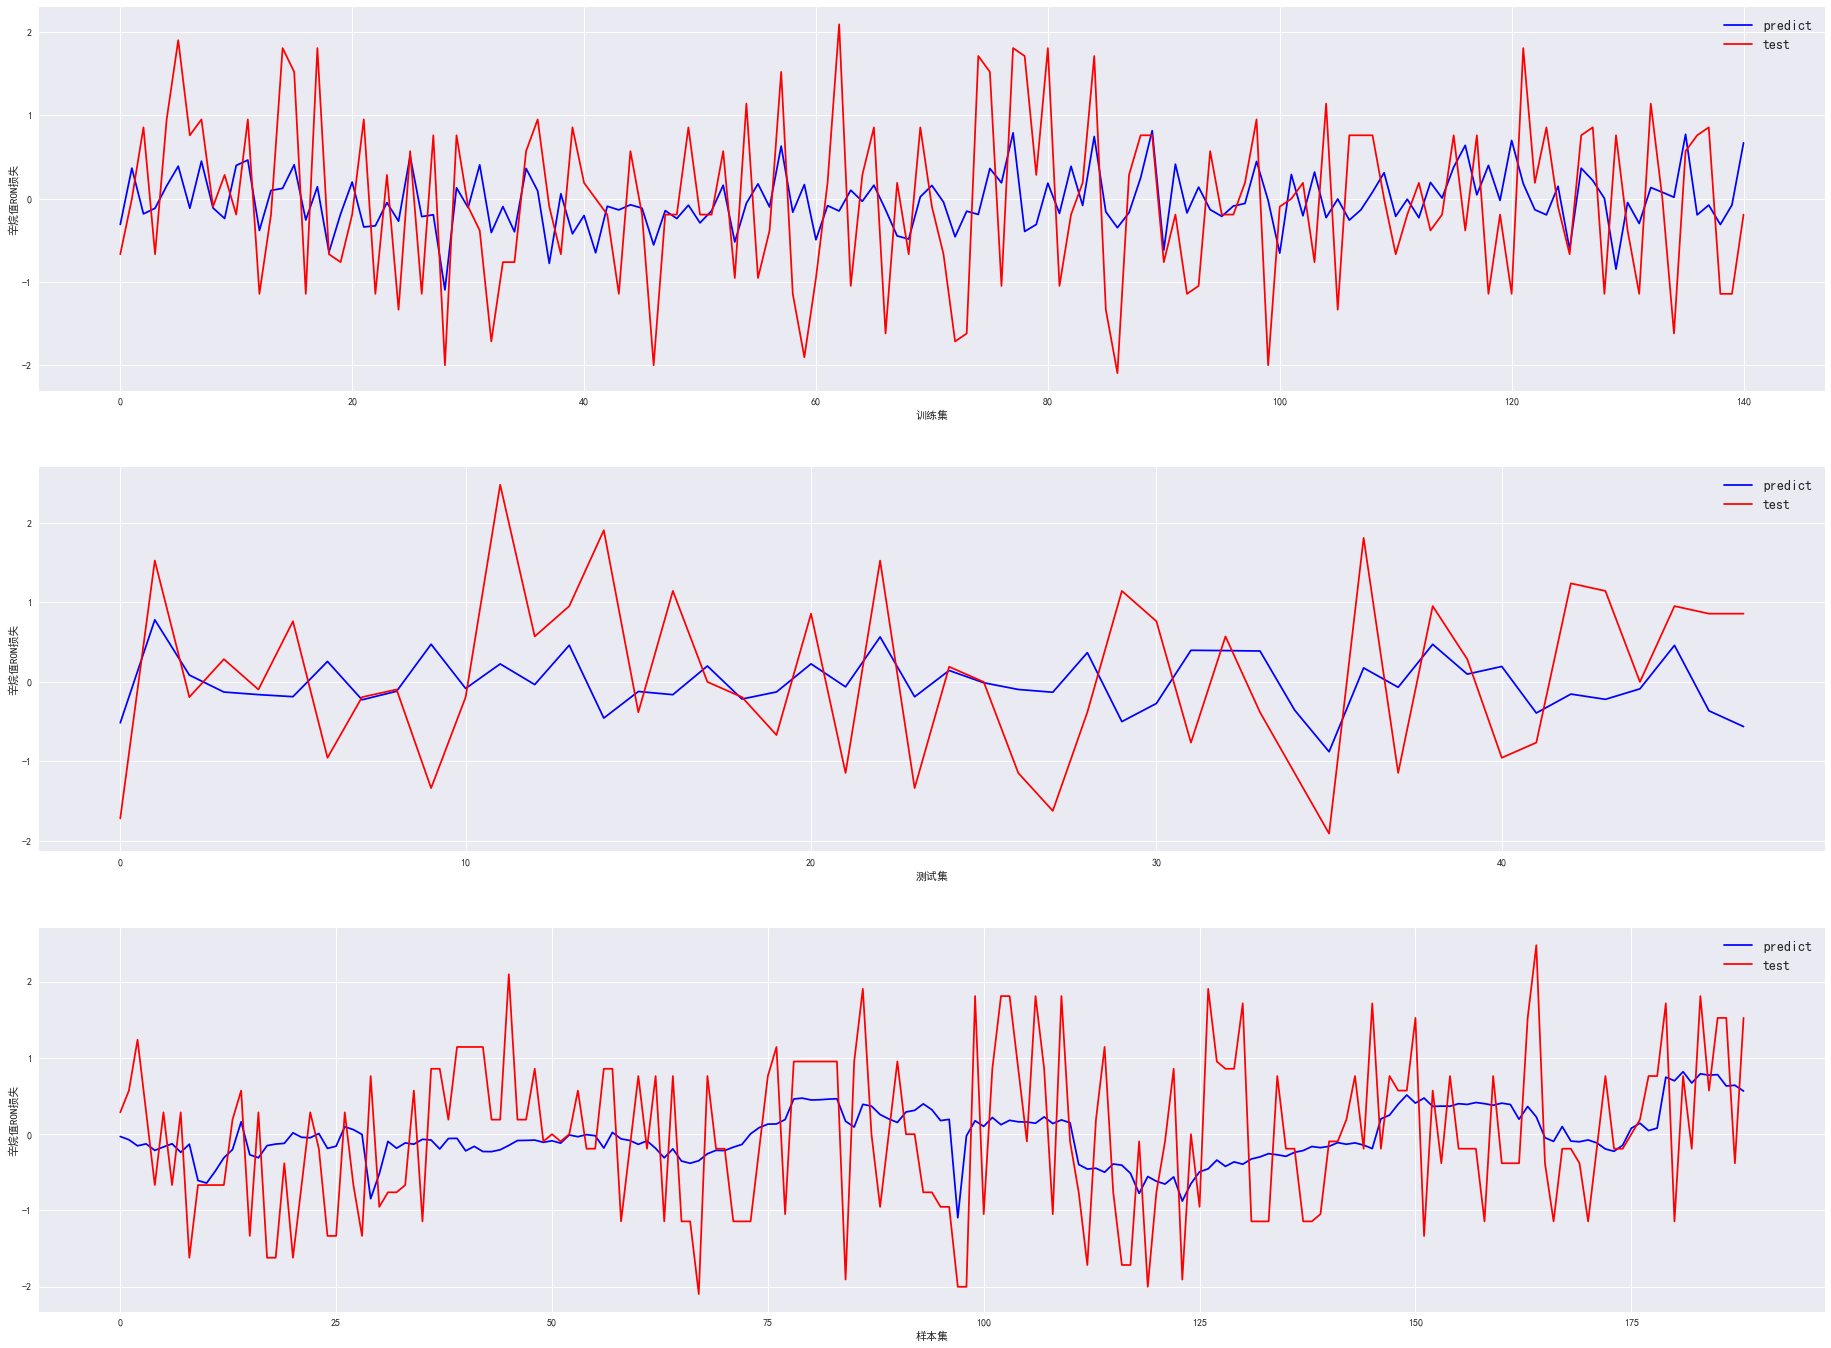

In [7]:
plt.figure(figsize = (32, 24))
plt.subplot(311)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(312)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(313)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()

## 对于 类别-2 进行线性回归建模

In [8]:
# 构建训练集和测试集 cluster 2nd
X = model_features_2nd
y = produc_features_2nd[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(87, 17)
y_train.shape=(87, 1)
X_test.shape=(30, 17)
y_test.shape=(30, 1)


In [9]:
# 简单线性回归
# Applying LinearRegression
model_2nd = LinearRegression()
model_2nd.fit(X_train, y_train)
y_train_pred = model_2nd.predict(X_train)
y_test_pred = model_2nd.predict(X_test)
y_pred = model_2nd.predict(X)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (metrics.mean_squared_error(y_train, y_train_pred), metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (metrics.r2_score(y_train, y_train_pred), metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y, y_pred)))

MSE train:0.634, test:14.918, whole:4.297
R^2 train:0.356, test:-13.285, whole:-3.297


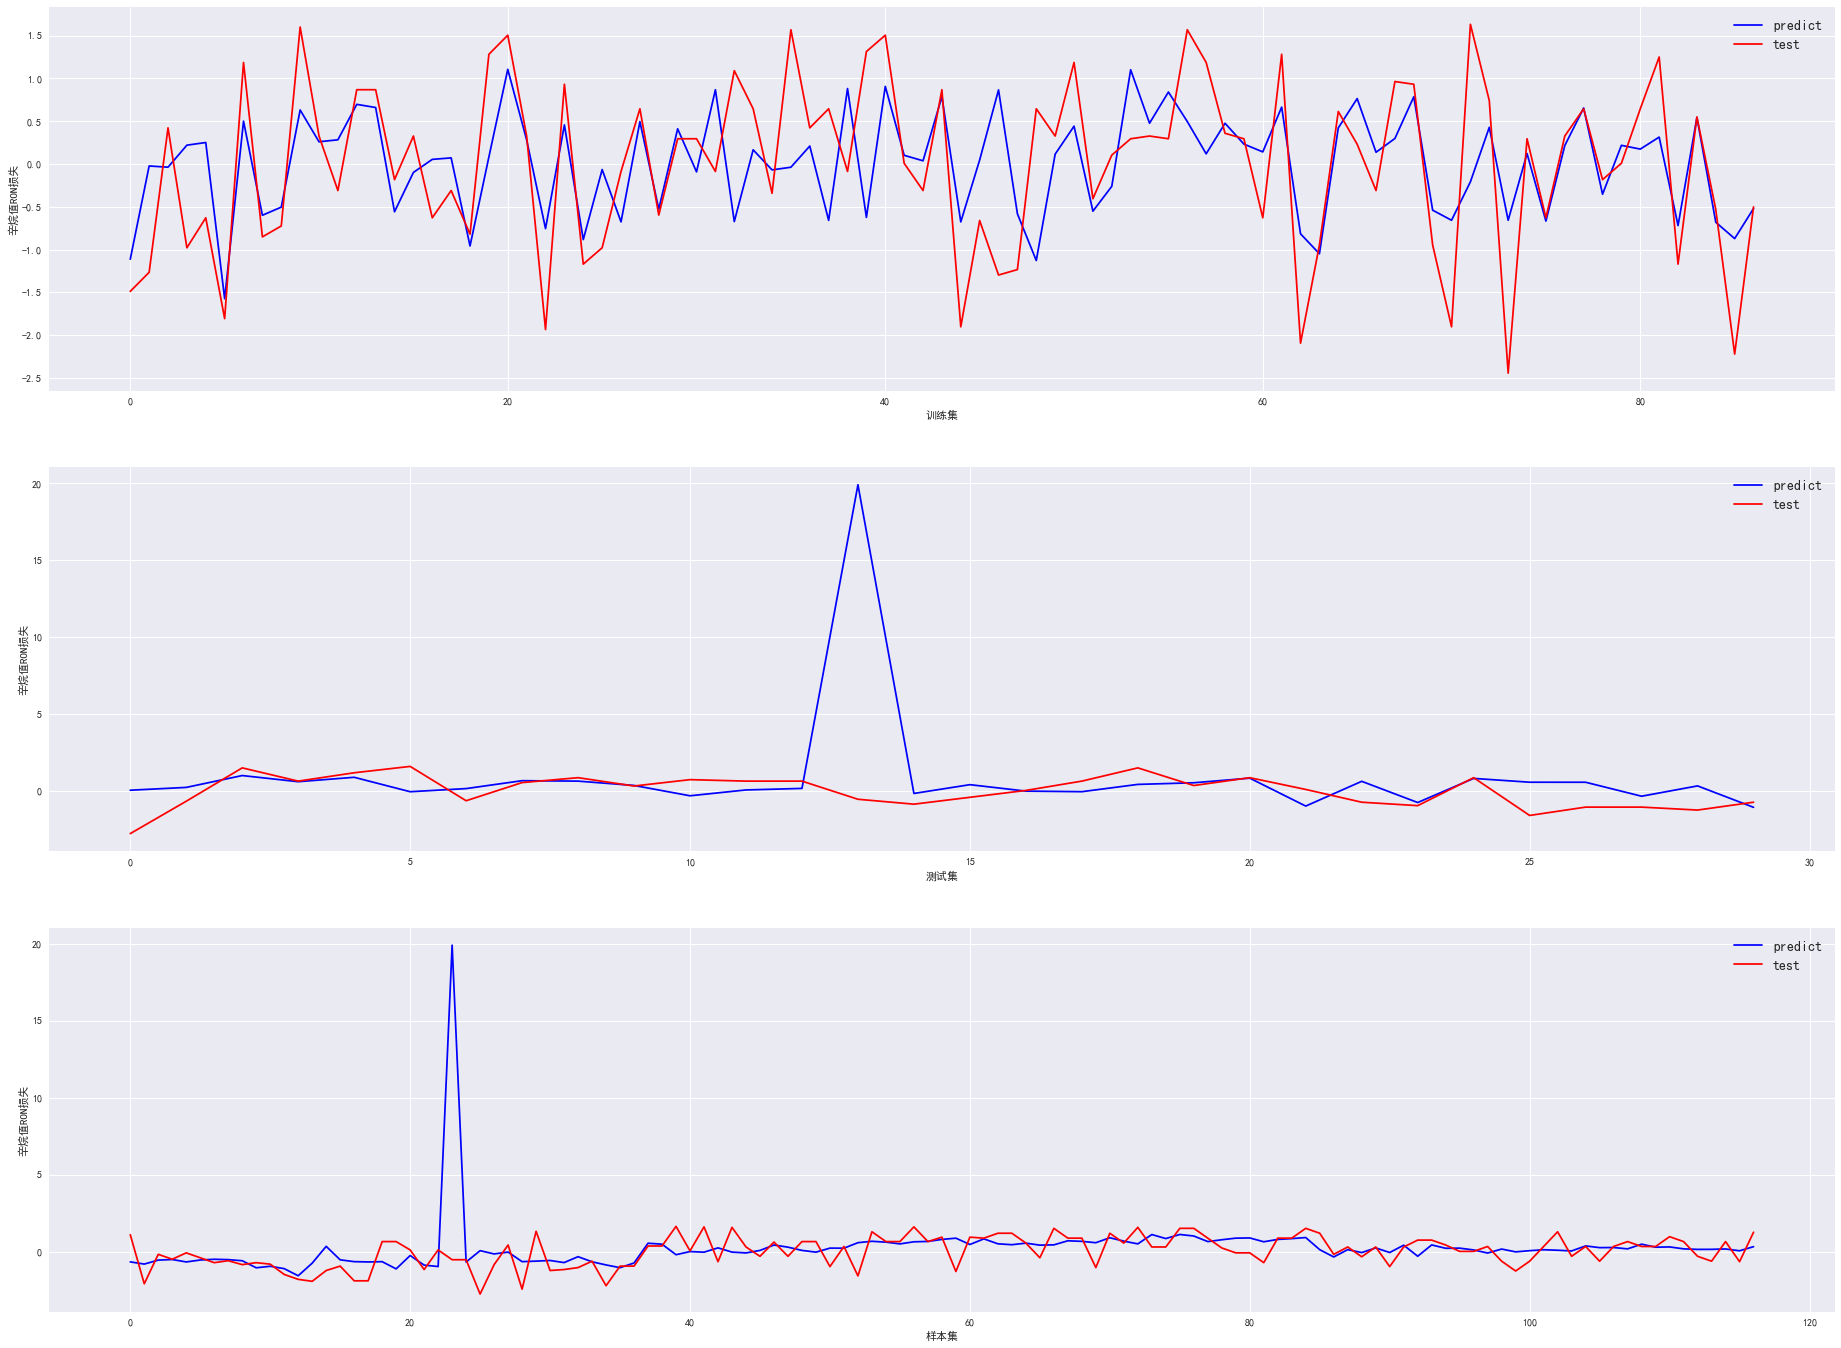

In [10]:
plt.figure(figsize = (32, 24))
plt.subplot(311)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(312)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(313)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()

## 选择各聚类的模型的特征的并集

In [11]:
X = samples_data[list(set(model_features_1st.keys()).union(set(model_features_2nd.keys())))]
y = samples_data[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(243, 24)
y_train.shape=(243, 1)
X_test.shape=(82, 24)
y_test.shape=(82, 1)


In [12]:
# 简单线性回归
# Applying LinearRegression
model_3rd = LinearRegression()
model_3rd.fit(X_train, y_train)
y_train_pred = model_3rd.predict(X_train)
y_test_pred = model_3rd.predict(X_test)
y_pred = model_3rd.predict(X)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (metrics.mean_squared_error(y_train, y_train_pred), metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (metrics.r2_score(y_train, y_train_pred), metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y, y_pred)))

MSE train:0.041, test:0.046, whole:0.042
R^2 train:0.241, test:-0.108, whole:0.169


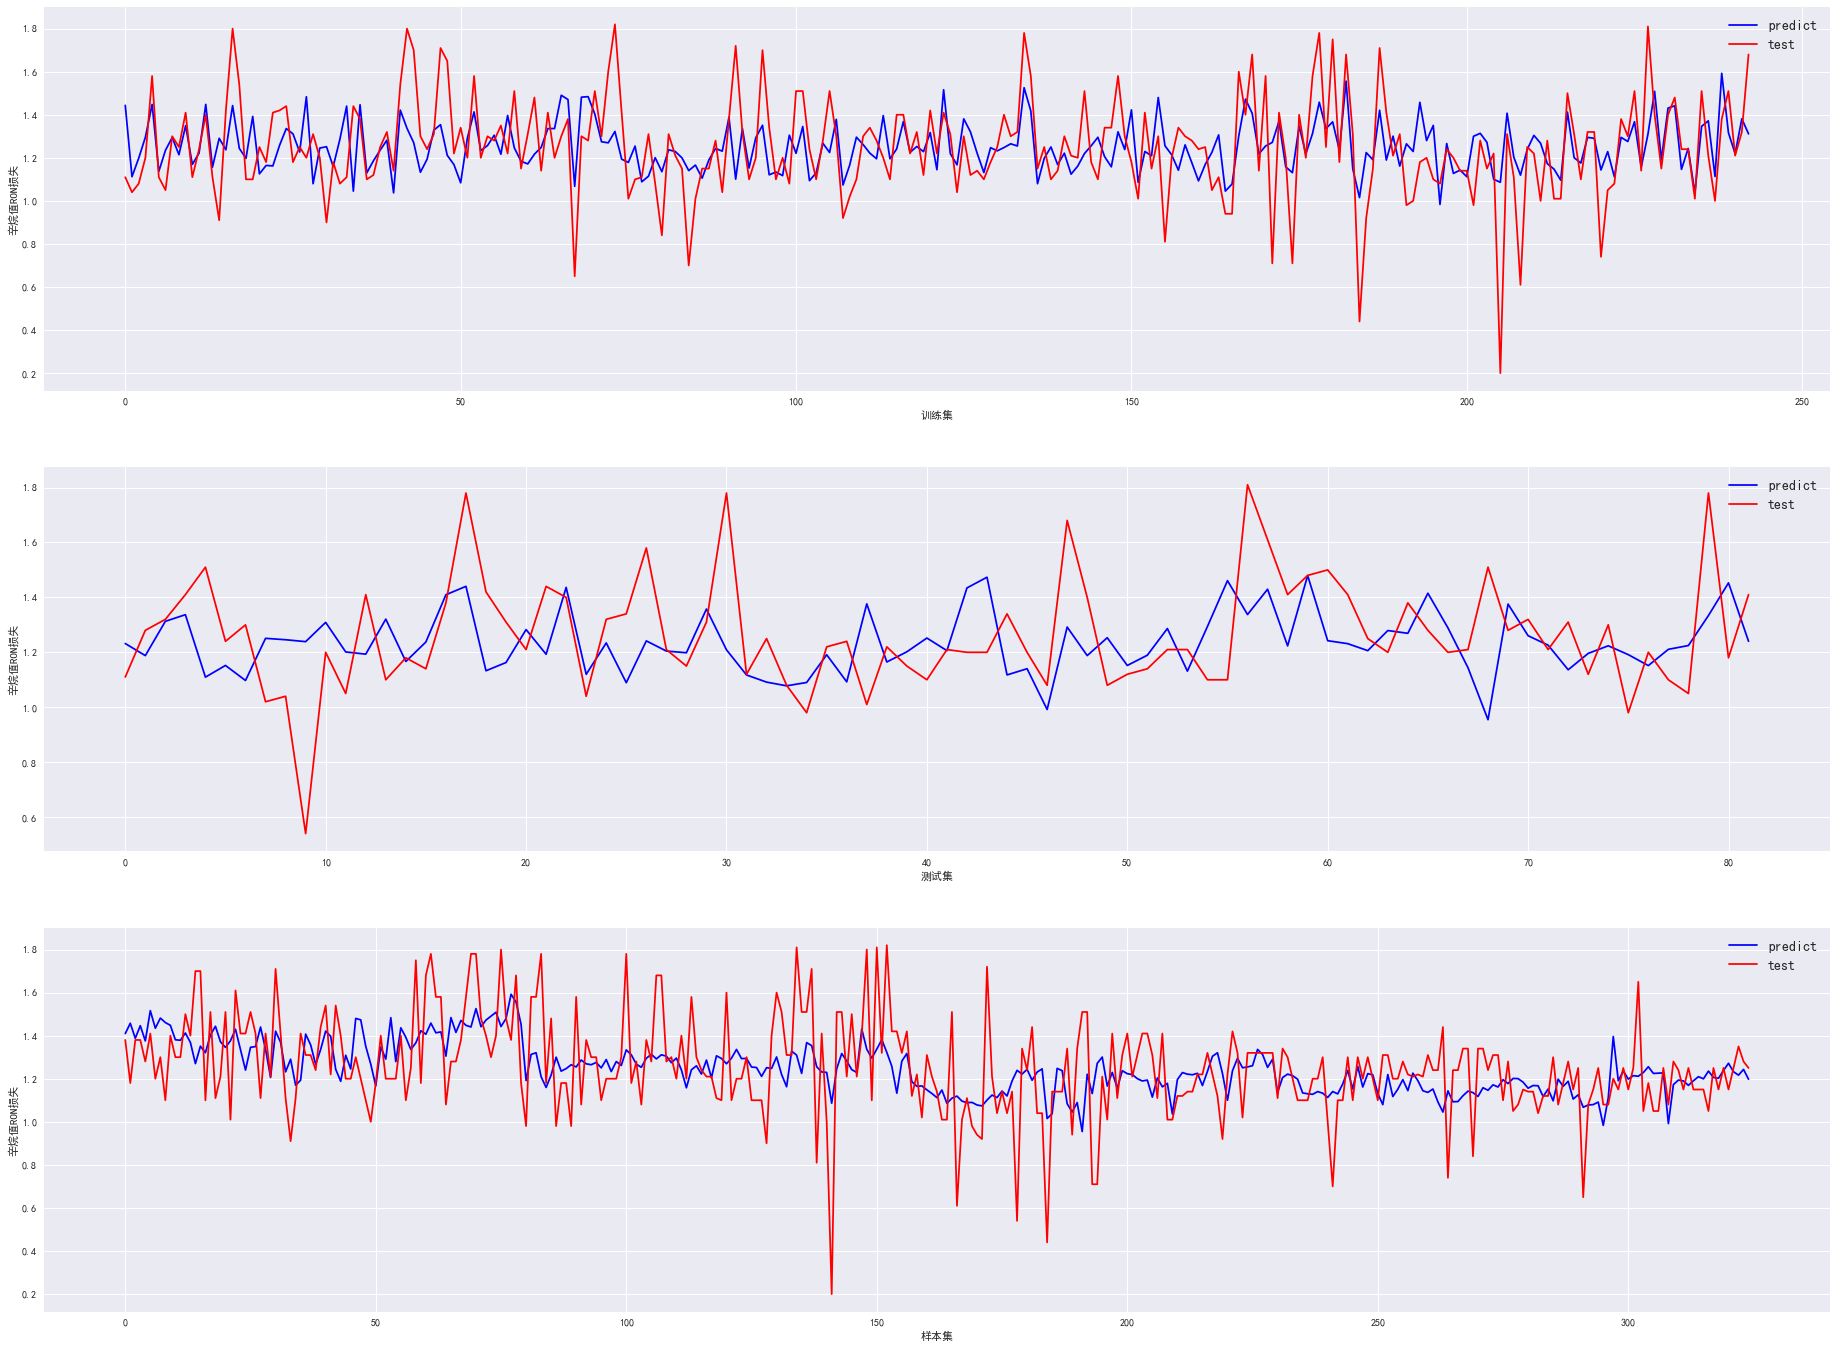

In [13]:
plt.figure(figsize = (32, 24))
plt.subplot(311)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(312)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(313)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()

## 选择各聚类线性模型的特征的交集

In [14]:
X = samples_data[list(set(model_features_1st.keys()).intersection(set(model_features_2nd.keys())))]
y = samples_data[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(243, 4)
y_train.shape=(243, 1)
X_test.shape=(82, 4)
y_test.shape=(82, 1)


In [15]:
# 简单线性回归
# Applying LinearRegression
model_4th = LinearRegression()
model_4th.fit(X_train, y_train)
y_train_pred = model_4th.predict(X_train)
y_test_pred = model_4th.predict(X_test)
y_pred = model_4th.predict(X)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (metrics.mean_squared_error(y_train, y_train_pred), metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (metrics.r2_score(y_train, y_train_pred), metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y, y_pred)))

MSE train:0.046, test:0.044, whole:0.045
R^2 train:0.093, test:0.144, whole:0.108


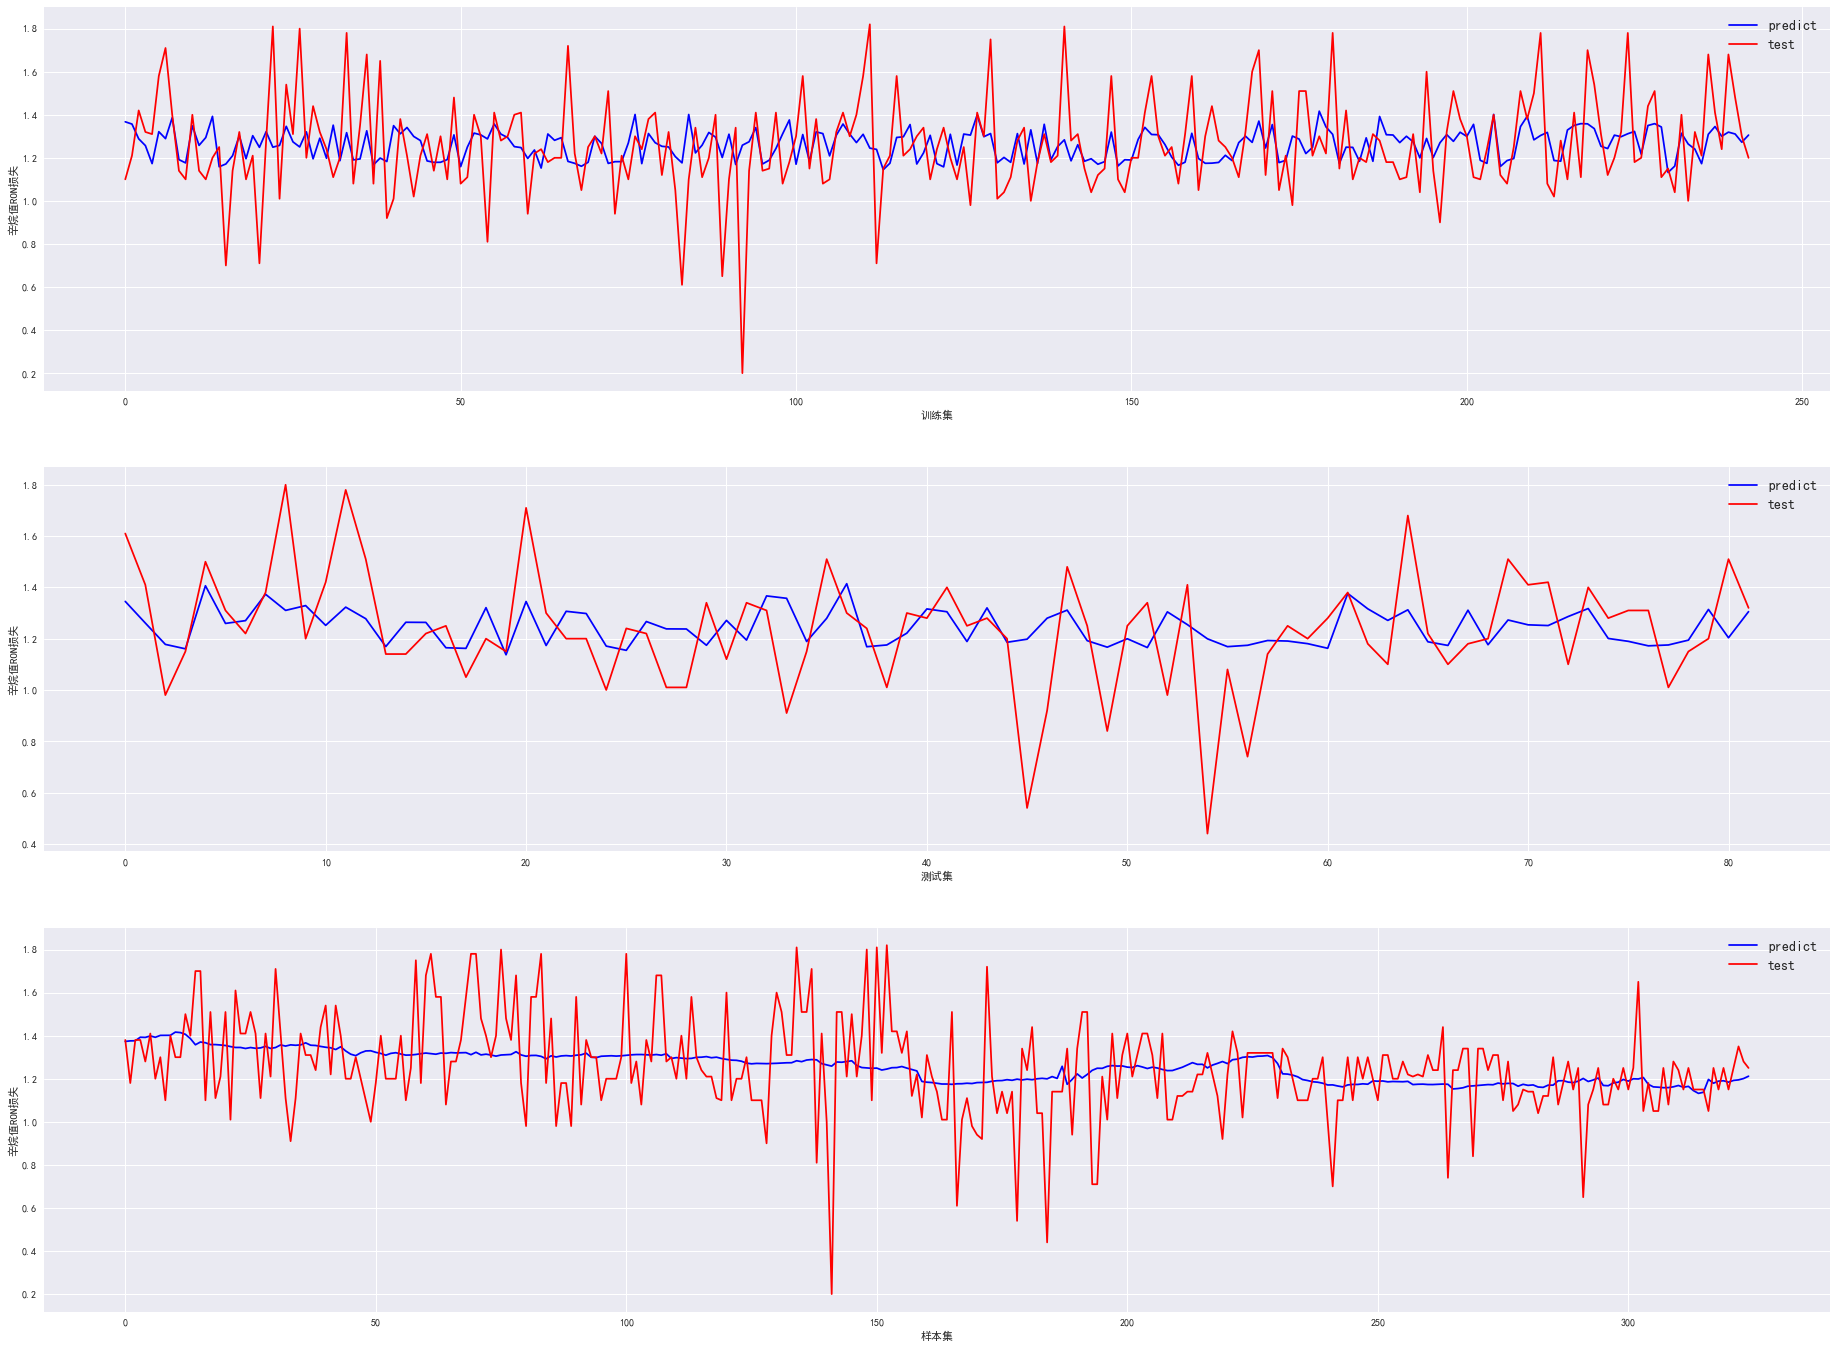

In [16]:
plt.figure(figsize = (32, 24))
plt.subplot(311)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(312)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(313)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()